In [2]:
import pandas as pd

In [4]:
def split_owner(owner_str):
    """
    Given an owner string like:
    - "Örsted [10%]; Felvig [90%]"  OR
    - "Owner1; Owner2" 
    returns a list of tuples (owner_name, fraction).
    
    If no percentages are provided for multiple owners, each is assigned an equal share.
    If some owners lack percentages while others have them, the remaining percentage is equally
    distributed among those missing percentages.
    """
    if not isinstance(Country_str, str):
        return [("Unknown", 1.0)]


    # Split the string by semicolon to handle multiple owners
    parts = [part.strip() for part in Country_str.split(';')]
    
    # Check if any part contains a percentage
    has_percentage = any('[' in part and ']' in part for part in parts)
    
    result = []
    
    if not has_percentage:
        # No percentages provided: assign equal share to each Country.
        equal_share = 1.0 / len(parts)
        for part in parts:
            # Clean the owner name in case any extraneous text exists
            name = part.split('[')[0].strip()
            result.append((name, equal_share))
    else:
        # Process each part: extract percentage if available.
        for part in parts:
            if '[' in part and ']' in part:
                name = part.split('[')[0].strip()
                percentage_str = part.split('[')[1].split(']')[0].strip().replace('%', '')
                try:
                    percentage = float(percentage_str) / 100.0
                except ValueError:
                    percentage = None
                result.append((name, percentage))
            else:
                # Part without a percentage: mark fraction as None for now.
                result.append((part, None))
        
        # For parts that are missing percentages, assign an equal share of the remaining capacity.
        total_assigned = sum(p for _, p in result if p is not None)
        missing_count = sum(1 for _, p in result if p is None)
        if missing_count > 0:
            remaining = max(0, 1.0 - total_assigned)  # Avoid negative
            missing_share = remaining / missing_count
            result = [(name, p if p is not None else missing_share) for name, p in result]
    
    return result

# Assume merged_bio is your DataFrame containing the "Owner" and "Capacity (MW)" columns.
# For example, if reading from CSV:
# merged_bio = pd.read_csv("Bioenergy_merged.csv")

# Create a new list to store expanded rows



In [8]:
df_over = pd.read_csv("Data/Bioenergy_overthresh.csv")
df_under = pd.read_csv("Data/Bioenergy_underthresh.csv")

# Concatenate the DataFrames vertically (row-wise)
# Concatenate the DataFrames vertically (row-wise)
Bio_df = pd.concat([df_over, df_under], ignore_index=True)
Active_bio_df = Bio_df[Bio_df['Status'] == 'operating']
Active_bio_df.rename(columns={'Country/Area': 'Country'}, inplace=True)


# Optionally, group by owner to get total attributed capacity per company
Bio_capacity_by_Country = Active_bio_df.groupby("Country")["Capacity (MW)"].sum().reset_index()

# Display the result
sum(Bio_capacity_by_Country['Capacity (MW)'])

/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/2655830611.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_bio_df.rename(columns={'Country/Area': 'Country'}, inplace=True)


84321.23

In [9]:
Bio_capacity_by_Country

,Country,Capacity (MW)
0,Angola,100.0
1,Argentina,180.0
2,Australia,280.0
3,Austria,70.0
4,Azerbaijan,37.0
...,...,...
62,United States,7288.0
63,Uruguay,650.0
64,Vietnam,15.0
65,Zambia,40.0


In [13]:
Coal_df = pd.read_csv("Data/Coal.csv")
Active_Coal_df = Coal_df[Coal_df['Status'] == 'operating']
Active_Coal_df.rename(columns={'Country/Area': 'Country'}, inplace=True)

# Optionally, group by owner to get total attributed capacity per Country
Coal_capacity_by_Country = Active_Coal_df.groupby("Country")["Capacity (MW)"].sum().reset_index()

# Display the result
sum(Coal_capacity_by_Country['Capacity (MW)'])

/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/2315626445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_Coal_df.rename(columns={'Country/Area': 'Country'}, inplace=True)


2143346.1

In [17]:
Coal_capacity_by_Country.sort_values(by = "Capacity (MW)", ascending=False)


,Country,Capacity (MW)
11,China,1171358.8
26,India,242562.7
70,United States,194131.4
27,Indonesia,54683.6
31,Japan,54167.0
...,...,...
36,Madagascar,120.0
44,Namibia,120.0
23,Honduras,105.0
21,Guadeloupe,64.0


In [20]:
df_over = pd.read_csv("Data/Geothermal_overthresh.csv")
df_under = pd.read_csv("Data/Geothermal_underthres.csv")
Geo_df = pd.concat([df_over, df_under], ignore_index=True)

Active_Geo_df = Geo_df[Geo_df['Status'] == 'operating']
Active_Geo_df.rename(columns={'Country/Area': 'Country'}, inplace=True)


# Optionally, group by owner to get total attributed capacity per company
Geo_capacity_by_Country = Active_Geo_df.groupby("Country")["Capacity (MW)"].sum().reset_index()

# Display the result
sum(Geo_capacity_by_Country['Capacity (MW)'])

/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/1638227272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_Geo_df.rename(columns={'Country/Area': 'Country'}, inplace=True)


13910.5

In [65]:
df_over = pd.read_csv("Data/Hydro_overthresh.csv")
df_under = pd.read_csv("Data/Hydro_underhresh.csv")

# Concatenate the DataFrames vertically (row-wise)
Hydro_df = pd.concat([df_over, df_under], ignore_index=True)
Active_Hydro_df = Hydro_df[Hydro_df['Status'] == 'operating']

Active_Hydro_df.rename(columns={'Country 1': 'Country'}, inplace=True)
Active_Hydro_df.rename(columns={'Region 1': 'Region'}, inplace=True)



# Optionally, group by owner to get total attributed capacity per company
Hydro_capacity_by_Country = Active_Hydro_df.groupby("Country")["Capacity (MW)"].sum().reset_index()

# Display the result
sum(Hydro_capacity_by_Country['Capacity (MW)'])


/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/503304719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_Hydro_df.rename(columns={'Country 1': 'Country'}, inplace=True)
/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/503304719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_Hydro_df.rename(columns={'Region 1': 'Region'}, inplace=True)


1136088.0

In [24]:
Hydro_capacity_by_Country.sort_values('Capacity (MW)')

,Country,Capacity (MW)
81,Papua New Guinea,77.0
33,Fiji,80.0
60,Liberia,88.0
63,Madagascar,91.0
2,Algeria,100.0
...,...,...
89,Russia,51279.0
18,Canada,76133.0
110,United States,86625.0
14,Brazil,106828.0


In [29]:
Nuclear_df = pd.read_csv("Data/Nuclear.csv")

# Filter rows where 'Status' is 'operating'
Active_Nuclear_df = Nuclear_df[Nuclear_df['Status'] == 'operating']

# Convert the " Capacity (MW) " column to numeric, without replacing the whole DataFrame
Active_Nuclear_df.loc[:, " Capacity (MW) "] = pd.to_numeric(Active_Nuclear_df[" Capacity (MW) "], errors="coerce")
Active_Nuclear_df.rename(columns={'Country/Area': 'Country'}, inplace=True)
Active_Nuclear_df.rename(columns={" Capacity (MW) ": "Capacity (MW)"}, inplace=True)


# Group by owner to get total attributed capacity per company
Nuclear_capacity_by_Country = Active_Nuclear_df.groupby("Country")["Capacity (MW)"].sum().reset_index()

# Display the result: sum of attributed capacity across all companies
total_capacity = sum(Nuclear_capacity_by_Country['Capacity (MW)'])
print("Total Attributed Capacity (MW):", total_capacity)

Total Attributed Capacity (MW): 396484


/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/2006318700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_Nuclear_df.rename(columns={'Country/Area': 'Country'}, inplace=True)
/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/2006318700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_Nuclear_df.rename(columns={" Capacity (MW) ": "Capacity (MW)"}, inplace=True)


In [31]:
Nuclear_capacity_by_Country.sort_values('Capacity (MW)')

,Country,Capacity (MW)
17,North Korea,5
1,Armenia,448
16,Netherlands,515
22,Slovenia,727
13,Iran,1000
19,Romania,1411
15,Mexico,1608
0,Argentina,1763
28,Taiwan,1902
23,South Africa,1940


In [32]:
df_over = pd.read_csv("Data/Wind_overthresh.csv")
df_under = pd.read_csv("Data/Wind_underthresh.csv")

# Concatenate the DataFrames vertically (row-wise)
Wind_df = pd.concat([df_over, df_under], ignore_index=True)
Active_Wind_df = Wind_df[Wind_df['Status'] == 'operating']
Active_Wind_df.rename(columns={'Country/Area': 'Country'}, inplace=True)



# Optionally, group by owner to get total attributed capacity per company
Wind_capacity_by_Country = Active_Wind_df.groupby("Country")["Capacity (MW)"].sum().reset_index()

# Display the result
sum(Wind_capacity_by_Country['Capacity (MW)'])

/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/1389928045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_Wind_df.rename(columns={'Country/Area': 'Country'}, inplace=True)


1005066.9999999999

In [33]:
Areas_coal = set(Coal_df.loc[:,'Subregion'])
Areas_Wind = set(Wind_df.loc[:,'Subregion'])
print(Areas_coal)
print(Areas_Wind)

{'Northern America', 'South-eastern Asia', 'Central Asia', 'Eastern Europe', 'Southern Europe', 'Sub-Saharan Africa', 'Western Asia', 'Melanesia', 'Southern Asia', 'Northern Europe', 'Australia and New Zealand', 'Northern Africa', 'Western Europe', 'Latin America and the Caribbean', 'Eastern Asia'}
{'Northern America', 'South-eastern Asia', 'Central Asia', 'Micronesia', 'Sub-Saharan Africa', 'Southern Europe', 'Eastern Europe', 'Western Asia', 'Melanesia', 'Southern Asia', 'Northern Europe', 'Polynesia', 'Australia and New Zealand', 'Northern Africa', 'Western Europe', 'Latin America and the Caribbean', 'Eastern Asia'}


In [44]:
df_over = pd.read_csv("Data/Oil_Gas_overthresh.csv")
df_under = pd.read_csv("Data/Oil_Gas_underthresh.csv")

# Concatenate the DataFrames vertically (row-wise)
OilGas_df = pd.concat([df_over, df_under], ignore_index=True)

Active_OilGas_df = OilGas_df[OilGas_df['Status'] == 'operating']
Active_OilGas_df.rename(columns={'Country/Area': 'Country'}, inplace=True)

# gas‐containing rows
df_gas = Active_OilGas_df[Active_OilGas_df['Fuel'].str.contains('gas', case=False, na=False)].copy()
# everything else
df_oil = Active_OilGas_df[~Active_OilGas_df['Fuel'].str.contains('gas', case=False, na=False)].copy()

# Optionally, group by owner to get total attributed capacity per company
Oil_capacity_by_Country = df_oil.groupby("Country")["Capacity (MW)"].sum().reset_index()
Gas_capacity_by_Country = df_gas.groupby("Country")["Capacity (MW)"].sum().reset_index()


Oil_capacity_by_Country.sort_values('Capacity (MW)')

/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/2719620391.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_OilGas_df.rename(columns={'Country/Area': 'Country'}, inplace=True)


,Country,Capacity (MW)
83,Saint Pierre and Miquelon,21.0
0,American Samoa,23.0
2,Argentina,28.0
81,Rwanda,28.8
106,United Arab Emirates,29.0
...,...,...
6,Bangladesh,7311.6
51,Japan,9191.0
46,Iraq,10956.0
108,United States,15278.0


In [43]:
df_over = pd.read_csv("Data/Solar_overthresh.csv")
df_under = pd.read_csv("Data/Solar_underthresh.csv")
# Concatenate the DataFrames vertically (row-wise)
Solar_df = pd.concat([df_over, df_under], ignore_index=True)
Active_Solar_df = Solar_df[Solar_df['Status'] == 'operating']
Active_Solar_df.rename(columns={'Country/Area': 'Country'}, inplace=True)



# Optionally, group by owner to get total attributed capacity per company
Solar_capacity_by_Country = Active_Solar_df.groupby("Country")["Capacity (MW)"].sum().reset_index()

# Display the result
sum(Solar_capacity_by_Country['Capacity (MW)'])

/var/folders/7j/s2kkprgj0zx6hrn11xc4tlwc0000gp/T/ipykernel_51900/1725608800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_Solar_df.rename(columns={'Country/Area': 'Country'}, inplace=True)


991110.0

In [63]:
set(Active_Geo_df["Region"].dropna().unique())


{'Africa', 'Americas', 'Asia', 'Europe', 'Oceania'}

In [91]:
dfs = [
    Solar_capacity_by_Country,
    Wind_capacity_by_Country,
    Nuclear_capacity_by_Country,
    Coal_capacity_by_Country,
    Hydro_capacity_by_Country,
    Oil_capacity_by_Country,
    Gas_capacity_by_Country,
    Bio_capacity_by_Country,
    Geo_capacity_by_Country
]
# 2. Build a master list of unique owners across all DataFrames



# 1. Rename each DataFrame’s capacity column to a unique name
Solar_capacity_by_Country = Solar_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Solar_capacity'}
)
Wind_capacity_by_Country = Wind_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Wind_capacity'}
)
Nuclear_capacity_by_Country = Nuclear_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Nuclear_capacity'}
)
Coal_capacity_by_Country = Coal_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Coal_capacity'}
)
Hydro_capacity_by_Country = Hydro_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Hydro_capacity'}
)
Oil_capacity_by_Country = Oil_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Oil_capacity'}
)
Gas_capacity_by_Country = Gas_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Gas_capacity'}
)
Bio_capacity_by_Country = Bio_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Bio_capacity'}
)
Geo_capacity_by_Country = Geo_capacity_by_Country.rename(
    columns={'Capacity (MW)': 'Geo_capacity'}
)

df_merged = Solar_capacity_by_Country.merge(Wind_capacity_by_Country, on='Country', how='outer') \
               .merge(Nuclear_capacity_by_Country, on='Country', how='outer') \
               .merge(Coal_capacity_by_Country, on='Country', how='outer') \
               .merge(Hydro_capacity_by_Country, on='Country', how='outer') \
               .merge(Oil_capacity_by_Country, on='Country', how='outer') \
                .merge(Gas_capacity_by_Country, on='Country', how='outer') \
               .merge(Bio_capacity_by_Country, on='Country', how='outer') \
               .merge(Geo_capacity_by_Country, on='Country', how='outer')

capacity_cols = [col for col in df_merged.columns if 'capacity' in col]
df_merged['total_capacity'] = df_merged[capacity_cols].sum(axis=1)

# 3. Sort by this new total_capacity column in descending order
df_merged_sorted = df_merged.sort_values(by='total_capacity', ascending=False)

# 4. Select the top 20 rows
df_merged_sorted[:30]

,Country,Solar_capacity,Wind_capacity,Nuclear_capacity,Coal_capacity,Hydro_capacity,Oil_capacity,Gas_capacity,Bio_capacity,Geo_capacity,total_capacity
41,China,487560.7,444178.1,58134,1171358.8,324972.0,NaN,152973.0,27777.50,NaN,2666954.1
197,United States,121361.1,152379.1,102475,194131.4,86625.0,15278.0,541051.1,7288.00,3630.5,1224219.2
84,India,75510.9,37185.3,7540,242562.7,43440.0,656.0,27240.0,789.00,NaN,434923.9
93,Japan,32614.2,5045.9,11608,54167.0,34696.0,9191.0,86461.0,3435.83,436.0,237654.93
155,Russia,2381.6,2453.2,28576,37312.1,51279.0,NaN,112074.0,154.00,50.0,234279.9
27,Brazil,21636.1,33763.4,1990,3101.0,106828.0,4410.0,18844.3,13461.00,NaN,204033.8
71,Germany,30036.3,48171.0,NaN,29700.5,6673.0,1147.0,32657.5,1103.00,NaN,149488.3
36,Canada,3867.4,16871.0,14629,3080.8,76133.0,2341.0,25924.6,1545.00,NaN,144391.8
172,South Korea,7645.9,1453.2,27071,41195.0,5960.0,523.0,49835.0,1154.00,NaN,134837.1
67,France,12209.0,25318.6,64040,1907.0,17637.0,1812.0,9885.0,408.00,NaN,133216.6


In [101]:
import numpy as np

# 1) Define the region‐by‐region capacity factors (0–1) for each source
cf_by_region = {
    # Africa
    "Africa": {
        "Solar_capacity":    0.16,
        "Wind_capacity":     0.25,
        "Nuclear_capacity":  0.60,
        "Coal_capacity":     0.60,
        "Hydro_capacity":    0.20,
        "Gas_capacity":      0.30,
        "Oil_capacity":      0.30,
        "Bio_capacity":      0.40,
        "Geo_capacity":      0.70,
    },
    # Americas (North + South)
    "Americas": {
        "Solar_capacity":    0.19,
        "Wind_capacity":     0.33,
        "Nuclear_capacity":  0.90,
        "Coal_capacity":     0.50,
        "Hydro_capacity":    0.45,
        "Gas_capacity":      0.35,
        "Oil_capacity":      0.35,
        "Bio_capacity":      0.50,
        "Geo_capacity":      0.75,
    },
    # Asia
    "Asia": {
        "Solar_capacity":    0.13,
        "Wind_capacity":     0.25,
        "Nuclear_capacity":  0.80,
        "Coal_capacity":     0.55,
        "Hydro_capacity":    0.40,
        "Gas_capacity":      0.40,
        "Oil_capacity":      0.40,
        "Bio_capacity":      0.50,
        "Geo_capacity":      0.80,
    },
    # Europe
    "Europe": {
        "Solar_capacity":    0.12,
        "Wind_capacity":     0.27,
        "Nuclear_capacity":  0.70,
        "Coal_capacity":     0.40,
        "Hydro_capacity":    0.35,
        "Gas_capacity":      0.30,
        "Oil_capacity":      0.30,
        "Bio_capacity":      0.50,
        "Geo_capacity":      0.70,
    },
    # Oceania
    "Oceania": {
        "Solar_capacity":    0.19,
        "Wind_capacity":     0.30,
        # no large nuclear in Oceania:
        "Nuclear_capacity":  np.nan,
        "Coal_capacity":     0.60,
        "Hydro_capacity":    0.30,
        "Gas_capacity":      0.20,
        "Oil_capacity":      0.20,
        "Bio_capacity":      0.50,
        "Geo_capacity":      0.80,
    },
}

# 2) For each region, vector‐apply its factors
for region, factors in cf_by_region.items():
    mask = df_merged_sorted["Region"] == region

    for cap_col, factor in factors.items():
        gen_col = cap_col.replace("_capacity", "_generation")
        df_merged_sorted.loc[mask, gen_col] = (
            df_merged_sorted.loc[mask, cap_col]
            * factor
            * 8760       # hours/year
            / 1_000_000  # to convert from MW·h to TWh
        )

# 3) If any companies didn’t match a region (mask never True), 
#    you can fill with a default factor or with NaNs now.

# 4) Recompute your totals
generation_cols = [
    c for c in df_merged_sorted.columns
    if c.endswith("_generation")
]
df_merged_sorted["total_generation"] = (
    df_merged_sorted[generation_cols].sum(axis=1)
)



                           Region  Nuclear  Coal  Hydro  Gas & Oil  Wind  \
0         Australia & New Zealand      NaN  50.0     35         45    35   
1                    Central Asia      NaN  50.0     40         55    25   
2                    Eastern Asia     82.0  55.0     40         43    25   
3                  Eastern Europe     75.0  50.0     35         40    30   
4   Latin America & the Caribbean     80.0  55.0     53         50    35   
5                       Melanesia      NaN   NaN     25         40    20   
6                 Northern Africa      NaN  40.0     30         45    30   
7                Northern America     90.0  45.0     40         55    40   
8                 Northern Europe     85.0  30.0     45         30    35   
9              South-eastern Asia      NaN  55.0     45         50    25   
10                  Southern Asia     80.0  55.0     40         50    25   
11                Southern Europe     70.0  35.0     35         40    30   
12          

KeyError: 'Region'

In [97]:
df_merged_sorted

,Country,Solar_capacity,Wind_capacity,Nuclear_capacity,Coal_capacity,Hydro_capacity,Oil_capacity,Gas_capacity,Bio_capacity,Geo_capacity,...,Solar_generation,Wind_generation,Nuclear_generation,Coal_generation,Hydro_generation,Gas_generation,Oil_generation,Bio_generation,Geo_generation,total_generation
41,China,487560.7,444178.1,58134,1171358.8,324972.0,NaN,152973.0,27777.50,NaN,...,768.785712,1128.390045,402.310534,4720.107420,1195.636982,603.019566,NaN,138.698613,NaN,8956.948872
197,United States,121361.1,152379.1,102475,194131.4,86625.0,15278.0,541051.1,7288.00,3630.5,...,191.362182,387.103866,709.16799,782.271889,318.710700,2132.823436,60.225876,36.390442,22.262226,4640.318607
84,India,75510.9,37185.3,7540,242562.7,43440.0,656.0,27240.0,789.00,NaN,...,119.065587,94.465536,52.179816,977.430656,159.824448,107.380080,2.585952,3.939635,NaN,1516.87171
93,Japan,32614.2,5045.9,11608,54167.0,34696.0,9191.0,86461.0,3435.83,436.0,...,51.426071,12.818604,80.332003,218.271343,127.653523,340.829262,36.230922,17.155786,2.673552,887.391067
155,Russia,2381.6,2453.2,28576,37312.1,51279.0,NaN,112074.0,154.00,50.0,...,3.755307,6.232109,197.75735,150.352838,188.665697,441.795708,NaN,0.768953,0.306600,989.634562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Micronesia,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003627
158,Saint Kitts and Nevis,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.005589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005589
97,Kiribati,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002838
4,Andorra,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002208


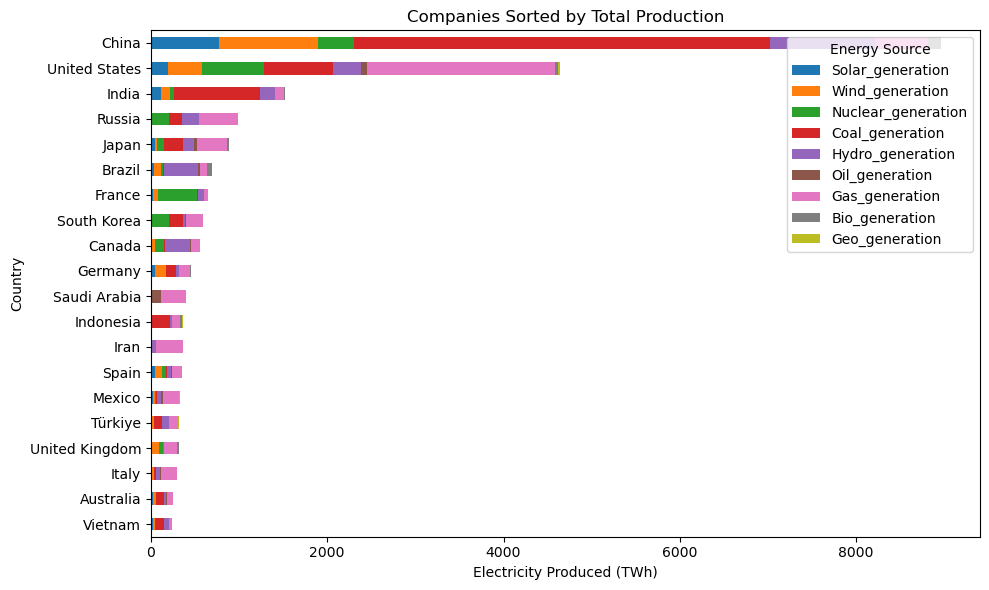

KeyError: 'Owner'

In [100]:
import matplotlib.pyplot as plt

# the columns you want to stack
plot_cols = [
    "Solar_generation",
    "Wind_generation",
    "Nuclear_generation",
    "Coal_generation",
    "Hydro_generation",
    "Oil_generation",
    "Gas_generation",
    "Bio_generation",
    "Geo_generation",
]

# grab only your data rows
df_plot = df_merged_sorted.iloc[:20].copy()

# -----------------------------------------------------------------------------
# 1) SORT BY TOTAL PRODUCTION
# -----------------------------------------------------------------------------
# compute a helper “Total” column
df_plot["Total"] = df_plot[plot_cols].sum(axis=1)

# sort by that total
df_total = df_plot.sort_values("Total")

# now plot (pandas will ignore “Total” if you only pass y=plot_cols)
ax = df_total.plot(
    kind="barh",
    x="Country",
    y=plot_cols,
    stacked=True,
    figsize=(10, 6),
)
ax.set_xlabel("Electricity Produced (TWh)")
ax.set_title("Companies Sorted by Total Production")
ax.legend(title="Energy Source", loc="upper right")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 2) SORT BY A SPECIFIC PRODUCTION METHOD
# -----------------------------------------------------------------------------
# pick whichever column you like—e.g. Solar_generation
method = "Coal_generation"

# sort by that one column
df_method = df_plot.sort_values(method)

ax = df_method.plot(
    kind="barh",
    x="Owner",
    y=plot_cols,
    stacked=True,
    figsize=(10, 6),
)
ax.set_xlabel("Electricity Produced (TWh)")
ax.set_title(f"Companies Sorted by {method.replace('_',' ').title()}")
ax.legend(title="Energy Source", loc="lower right")
plt.tight_layout()
plt.show()


In [28]:
df_merged_sorted


,Owner,Solar_capacity,Wind_capacity,Nuclear_capacity,Coal_capacity,Hydro_capacity,OilGas_capacity,Bio_capacity,Geo_capacity,total_capacity,Solar_generation,Wind_generation,Nuclear_generation,Coal_generation,Hydro_generation,OilGas_generation,Bio_generation,Geo_generation,total_estimated_generation
12923,Unknown,253479.200000,233793.200000,5.0,500.000000,39586.0727,4194.600,11598.0,537.0,543693.072700,399.686003,593.928245,0.034602,2.014800,145.645079,16.535113,57.911134,3.292884,1219.047859
6002,Huaneng Power International Inc,3570.000000,1298.000000,NaN,75511.770000,NaN,NaN,60.0,NaN,80439.770000,5.629176,3.297439,NaN,304.282228,NaN,NaN,0.299592,NaN,313.508436
3574,Electricité de France SA,NaN,NaN,64040.0,1260.000000,NaN,5477.700,NaN,NaN,70777.700000,NaN,NaN,443.182416,5.077296,NaN,21.593093,NaN,NaN,469.852805
8386,NTPC Ltd,3782.000000,50.000000,NaN,59395.000000,NaN,4007.000,NaN,NaN,67234.000000,5.963458,0.127020,NaN,239.338092,NaN,15.795594,NaN,NaN,261.224164
10447,Saudi Electricity Co,53.333333,NaN,NaN,NaN,NaN,60986.500,NaN,NaN,61039.833333,0.084096,NaN,NaN,NaN,NaN,240.408783,NaN,NaN,240.492879
2066,China Energy Investment Corp,NaN,NaN,NaN,60115.940000,NaN,NaN,NaN,NaN,60115.940000,NaN,NaN,NaN,242.243192,NaN,NaN,NaN,NaN,242.243192
2365,China Shenhua Energy Co Ltd,225.000000,NaN,NaN,49675.635000,NaN,NaN,NaN,NaN,49900.635000,0.354780,NaN,NaN,200.172939,NaN,NaN,NaN,NaN,200.527719
6672,JERA Co Inc,NaN,331.033333,NaN,NaN,NaN,47098.200,NaN,NaN,47429.233333,NaN,0.840957,NaN,NaN,NaN,185.661104,NaN,NaN,186.502061
3992,Eskom Holdings SOC Ltd,NaN,100.000000,NaN,43731.800000,NaN,2418.000,NaN,NaN,46249.800000,NaN,0.254040,NaN,176.221661,NaN,9.531756,NaN,NaN,186.007457
3013,Datang International Power Generation Co Ltd,1914.566667,1486.500000,NaN,38631.140000,NaN,1500.000,NaN,NaN,43532.206667,3.018889,3.776305,NaN,155.668042,NaN,5.913000,NaN,NaN,168.376235


In [74]:
import pandas as pd
import plotly.express as px

# Load and aggregate
df = pd.read_csv('Data/Coal.csv')
active = df[df['Status'] == 'operating'].copy()
active.rename(columns={'Country/Area': 'Country'}, inplace=True)
capacity_by_country = active.groupby('Country')['Capacity (MW)'].sum().reset_index()

# Map: Choropleth
# Map country names to ISO-3 codes
import pycountry

def name_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

capacity_by_country['iso_alpha'] = capacity_by_country['Country'].apply(name_to_iso3)
map_df = capacity_by_country.dropna(subset=['iso_alpha'])

fig_map = px.choropleth(
    map_df,
    locations="iso_alpha",
    color="Capacity (MW)",
    hover_name="Country",
    color_continuous_scale="OrRd",
    title="Operating Coal Capacity by Country"
)
fig_map.update_geos(showcountries=True, showframe=False)
fig_map.write_html("coal_capacity_map.html")

# Histogram: Top 20 Countries
top20 = capacity_by_country.sort_values('Capacity (MW)', ascending=False).head(20)
fig_bar = px.bar(
    top20,
    x='Country',
    y='Capacity (MW)',
    title='Top 20 Countries by Operating Coal Capacity'
)
fig_bar.update_layout(xaxis_tickangle=-45)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Country=%{x}<br>Capacity (MW)=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['China', 'India', 'United States', 'Indonesia', 'Japan', 'South Africa',
                          'South Korea', 'Russia', 'Germany', 'Poland', 'Vietnam', 'Australia',
                          'Türkiye', 'Taiwan', 'Kazakhstan', 'Malaysia', 'Philippines',
                          'Pakistan', 'Czech Republic', 'Thailand'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('zczMzJ7fMUGamZmZFZwNQTMzMzObsg' ... 'AANcBAmpmZmZnrvEAAAAAAAPq3QA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Top 20 Countries by Operating Coal Capacity'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'tickangle': -45, 'title': {'text': 'Country'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Capacity (MW)'}}}
})

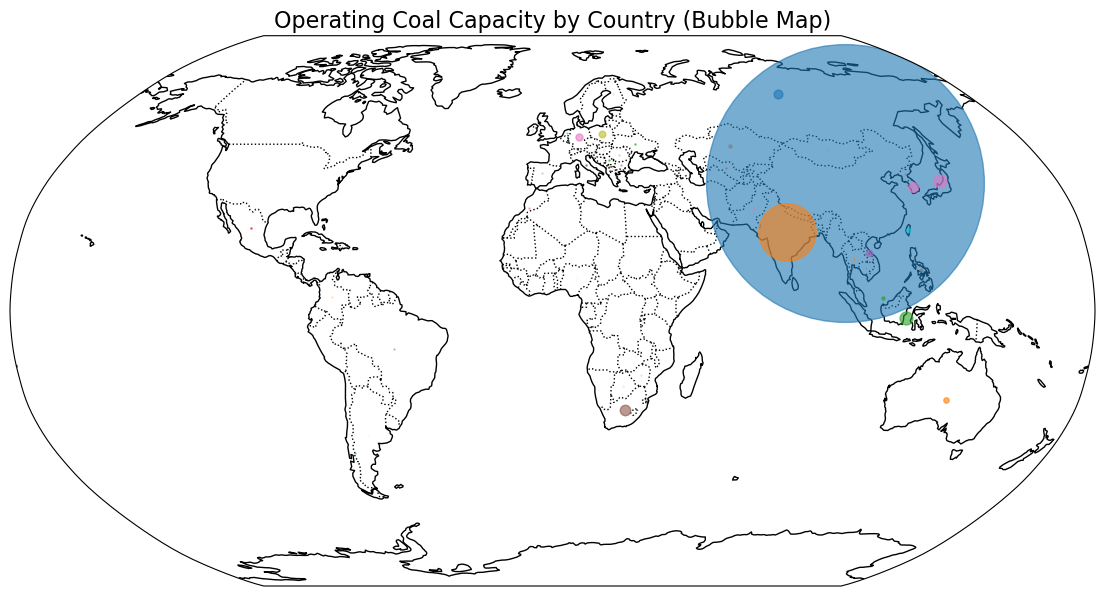

In [82]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1) Read world shapes & compute centroids
world = gpd.read_file("Countries/ne_110m_admin_0_countries.shx")
# 2) Reproject to a projected CRS (e.g. Web Mercator)
world_proj = world.to_crs(epsg=3857)

# 3) Compute centroids in the projected CRS
world_proj["centroid_proj"] = world_proj.geometry.centroid

# 4) Transform those centroids back to geographic (EPSG:4326)
centroids_geo = world_proj["centroid_proj"].to_crs(epsg=4326)

# 5) Extract lon/lat
world["lon"] = centroids_geo.x
world["lat"] = centroids_geo.y

# 2) Load & aggregate your coal data
coal = pd.read_csv("Data/Coal.csv")
active = coal[coal.Status == "operating"].copy()
active.rename(columns={"Country/Area": "Country"}, inplace=True)
cap_by_ctry = (
    active
    .groupby("Country")["Capacity (MW)"]
    .sum()
    .reset_index()
)

# 3) Merge on country name (may need small name fixes like "United States")
merged = cap_by_ctry.merge(
    world[["NAME", "lon", "lat"]],
    left_on="Country",
    right_on="NAME",
    how="left"
)

# 4) Plot bubble map
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")

max_cap = merged["Capacity (MW)"].max()
for _, row in merged.dropna(subset=["lon", "lat"]).iterrows():
    # scale marker size relative to the max
    size = 200 * (row["Capacity (MW)"] / max_cap)
    ax.plot(
        row["lon"], row["lat"],
        "o",
        markersize=size,
        alpha=0.6,
        transform=ccrs.PlateCarree()
    )

ax.set_title("Operating Coal Capacity by Country (Bubble Map)", fontsize=16)
plt.show()


In [79]:
print(world.columns.tolist())


['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD